In [77]:
!pip install pymongo

In [78]:
import pymongo
import pandas as pd
from datetime import datetime

myclient = pymongo.MongoClient('auth-path')
mydb = myclient['database']
collection = mydb['collection']
collection.find_one()

{'_id': ObjectId('6083563734a96a2d599d7465'),
 'ts': datetime.datetime(2021, 4, 23, 23, 20, 23, 35000),
 'deviceId': '2db95bc0-8b01-429d-84b8-2ad09c29be70',
 'topic': 'RM8-Teste/cd02ff/temperature',
 'value': '32'}

In [79]:
topic = 'RM1/204cfe/pub'

start = datetime(2021, 7, 10, 0, 0, 0)
end = datetime(2021, 7, 17, 0, 0, 0)

cursor = collection.find({'ts': {'$lt': end, '$gte': start}, 'topic': topic})

df =  pd.DataFrame(list(cursor))
df

,_id,ts,deviceId,topic,value
0,60f21d631c5379384f00e8e8,2021-07-16 23:59:31.733,204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
1,60f21d311c5379384f00de07,2021-07-16 23:58:41.264,204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
2,60f21d271c5379384f00dbe6,2021-07-16 23:58:31.100,204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
3,60f21bd91c5379384f00946f,2021-07-16 23:52:57.575,204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
4,60f21bcf1c5379384f009251,2021-07-16 23:52:47.486,204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
...,...,...,...,...,...
7770,60e8e39f1c5379384f099841,2021-07-10 00:02:39.435,RM1/204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
7771,60e8e38b1c5379384f0993c4,2021-07-10 00:02:19.092,RM1/204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
7772,60e8e3581c5379384f0988c9,2021-07-10 00:01:28.688,RM1/204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
7773,60e8e3301c5379384f097fff,2021-07-10 00:00:48.745,RM1/204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."


In [80]:
df.value[0]

'&fields=monitor,MQTT_ID,time,millis,max_loop_wdt_cnt,FreeHeap,minFreeHeap,fs_usedBytes,wifi_rssi {"time":1626469170,"fs_usedBytes":343870,"millis":529937469,"max_loop_wdt_cnt":1203,"MQTT_ID":"RM1/204cfe","FreeHeap":37240,"minFreeHeap":32744,"wifi_rssi":-52}'

In [81]:
chipIDlist = ["RM1/a85cb5", "TV4x2/7af141", "TV4x2/14bb3e", "ArCond2/735917", "RM/ad5416", "RM/35a006", "RM/3948bf", "RM/7af0e2","R4x2o/284a47","R4x2o/283c37","R4x2/e46af6","R4x2/e3f450","RM8/a7d186","R4x4ir/208770","R4x4o/359ae7","R4x4ir5/a8650c","R4x4ir5/d65fa5","RM6/a98e1c","WifiModem/d666c9","RM1/d6637e","RM1t10o/6fa252"]

for chipID in chipIDlist:
    
    print(chipID)

    topic = chipID+'/pub'

    start = datetime(2021, 7, 10, 0, 0, 0)
    end = datetime(2021, 7, 17, 0, 0, 0)

    cursor = collection.find({'ts': {'$lt': end, '$gte': start}, 'topic': topic})

    df2 =  pd.DataFrame(list(cursor))

    df = df.append(df2)

RM1/a85cb5
TV4x2/7af141
TV4x2/14bb3e
ArCond2/735917
RM/ad5416
RM/35a006
RM/3948bf
RM/7af0e2
R4x2o/284a47
R4x2o/283c37
R4x2/e46af6
R4x2/e3f450
RM8/a7d186
R4x4ir/208770
R4x4o/359ae7
R4x4ir5/a8650c
R4x4ir5/d65fa5
RM6/a98e1c
WifiModem/d666c9
RM1/d6637e
RM1t10o/6fa252


In [82]:
df

,_id,ts,deviceId,topic,value
0,60f21d631c5379384f00e8e8,2021-07-16 23:59:31.733,204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
1,60f21d311c5379384f00de07,2021-07-16 23:58:41.264,204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
2,60f21d271c5379384f00dbe6,2021-07-16 23:58:31.100,204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
3,60f21bd91c5379384f00946f,2021-07-16 23:52:57.575,204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
4,60f21bcf1c5379384f009251,2021-07-16 23:52:47.486,204cfe,RM1/204cfe/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
...,...,...,...,...,...
59499,60e8e3301c5379384f097ff1,2021-07-10 00:00:48.594,RM1t10o/6fa252,RM1t10o/6fa252/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
59500,60e8e3261c5379384f097dbc,2021-07-10 00:00:38.433,RM1t10o/6fa252,RM1t10o/6fa252/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
59501,60e8e31c1c5379384f097b95,2021-07-10 00:00:28.243,RM1t10o/6fa252,RM1t10o/6fa252/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."
59502,60e8e3121c5379384f097963,2021-07-10 00:00:18.337,RM1t10o/6fa252,RM1t10o/6fa252/pub,"&fields=monitor,MQTT_ID,time,millis,max_loop_w..."


In [87]:
df.to_csv("output-mdb.csv", index=False)

In [83]:
client.close

<bound method MongoClient.close of MongoClient(host=['li697-150.members.linode.com:50017'], document_class=dict, tz_aware=False, connect=True)>

In [1]:
import pandas as pd

df2 = pd.read_csv('output-mdb.csv')

df2['value'] = df2['value'].apply(lambda x: x[x.find('{"time"'):])

df2

,_id,ts,deviceId,topic,value
0,60f21d631c5379384f00e8e8,2021-07-16 23:59:31.733,204cfe,RM1/204cfe/pub,"{""time"":1626469170,""fs_usedBytes"":343870,""mill..."
1,60f21d311c5379384f00de07,2021-07-16 23:58:41.264,204cfe,RM1/204cfe/pub,"{""time"":1626469119,""fs_usedBytes"":343870,""mill..."
2,60f21d271c5379384f00dbe6,2021-07-16 23:58:31.100,204cfe,RM1/204cfe/pub,"{""time"":1626469109,""fs_usedBytes"":343870,""mill..."
3,60f21bd91c5379384f00946f,2021-07-16 23:52:57.575,204cfe,RM1/204cfe/pub,"{""time"":1626468776,""fs_usedBytes"":343870,""mill..."
4,60f21bcf1c5379384f009251,2021-07-16 23:52:47.486,204cfe,RM1/204cfe/pub,"{""time"":1626468766,""fs_usedBytes"":343870,""mill..."
...,...,...,...,...,...
596378,60e8e3301c5379384f097ff1,2021-07-10 00:00:48.594,RM1t10o/6fa252,RM1t10o/6fa252/pub,"{""time"":1625864447,""fs_usedBytes"":221633,""mill..."
596379,60e8e3261c5379384f097dbc,2021-07-10 00:00:38.433,RM1t10o/6fa252,RM1t10o/6fa252/pub,"{""time"":1625864437,""fs_usedBytes"":221633,""mill..."
596380,60e8e31c1c5379384f097b95,2021-07-10 00:00:28.243,RM1t10o/6fa252,RM1t10o/6fa252/pub,"{""time"":1625864427,""fs_usedBytes"":221633,""mill..."
596381,60e8e3121c5379384f097963,2021-07-10 00:00:18.337,RM1t10o/6fa252,RM1t10o/6fa252/pub,"{""time"":1625864417,""fs_usedBytes"":221633,""mill..."


In [4]:
import pandas
from pandas import json_normalize

def testjson(x):
    index = x.find('}')
    
    if (index > 0):
        return(1)
    
    else:
        return(0)

df2['valid'] = df2['value'].apply(lambda x: testjson(x))

df2 = df2[df2.valid == 1]

df2 = df2.drop(columns=['_id','deviceId','valid'])

df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,ts,topic,value
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,"{""time"":1626469170,""fs_usedBytes"":343870,""mill..."
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,"{""time"":1626469119,""fs_usedBytes"":343870,""mill..."
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,"{""time"":1626469109,""fs_usedBytes"":343870,""mill..."
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,"{""time"":1626468776,""fs_usedBytes"":343870,""mill..."
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,"{""time"":1626468766,""fs_usedBytes"":343870,""mill..."
...,...,...,...
596378,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,"{""time"":1625864447,""fs_usedBytes"":221633,""mill..."
596379,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,"{""time"":1625864437,""fs_usedBytes"":221633,""mill..."
596380,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,"{""time"":1625864427,""fs_usedBytes"":221633,""mill..."
596381,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,"{""time"":1625864417,""fs_usedBytes"":221633,""mill..."


In [7]:
df2['board'] = "esp8266"

df2

,ts,topic,value,board
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,"{""time"":1626469170,""fs_usedBytes"":343870,""mill...",esp8266
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,"{""time"":1626469119,""fs_usedBytes"":343870,""mill...",esp8266
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,"{""time"":1626469109,""fs_usedBytes"":343870,""mill...",esp8266
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,"{""time"":1626468776,""fs_usedBytes"":343870,""mill...",esp8266
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,"{""time"":1626468766,""fs_usedBytes"":343870,""mill...",esp8266
...,...,...,...,...
596378,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,"{""time"":1625864447,""fs_usedBytes"":221633,""mill...",esp8266
596379,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,"{""time"":1625864437,""fs_usedBytes"":221633,""mill...",esp8266
596380,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,"{""time"":1625864427,""fs_usedBytes"":221633,""mill...",esp8266
596381,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,"{""time"":1625864417,""fs_usedBytes"":221633,""mill...",esp8266


In [11]:
df2['firmware'] = df2['topic'].apply(lambda x: x[:x.find("/")])

df2

,ts,topic,value,board,firmware
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,"{""time"":1626469170,""fs_usedBytes"":343870,""mill...",esp8266,RM1
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,"{""time"":1626469119,""fs_usedBytes"":343870,""mill...",esp8266,RM1
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,"{""time"":1626469109,""fs_usedBytes"":343870,""mill...",esp8266,RM1
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,"{""time"":1626468776,""fs_usedBytes"":343870,""mill...",esp8266,RM1
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,"{""time"":1626468766,""fs_usedBytes"":343870,""mill...",esp8266,RM1
...,...,...,...,...,...
596378,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,"{""time"":1625864447,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o
596379,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,"{""time"":1625864437,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o
596380,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,"{""time"":1625864427,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o
596381,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,"{""time"":1625864417,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o


In [13]:
df2['chipid'] = df2['topic'].apply(lambda x: x[(x.find("/")+1):x.find("/pub")])

df2

,ts,topic,value,board,firmware,chipid
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,"{""time"":1626469170,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,"{""time"":1626469119,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,"{""time"":1626469109,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,"{""time"":1626468776,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,"{""time"":1626468766,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe
...,...,...,...,...,...,...
596378,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,"{""time"":1625864447,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252
596379,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,"{""time"":1625864437,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252
596380,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,"{""time"":1625864427,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252
596381,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,"{""time"":1625864417,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252


In [16]:
df2.iloc[0].value

'{"time":1626469170,"fs_usedBytes":343870,"millis":529937469,"max_loop_wdt_cnt":1203,"MQTT_ID":"RM1/204cfe","FreeHeap":37240,"minFreeHeap":32744,"wifi_rssi":-52}'

In [19]:
df2['freeheap'] = df2['value'].apply(lambda x: x[(x.find("FreeHeap\":")+10):x.find(",\"minFreeHeap")])

df2

,ts,topic,value,board,firmware,chipid,freeheap
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,"{""time"":1626469170,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37240
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,"{""time"":1626469119,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37352
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,"{""time"":1626469109,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37352
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,"{""time"":1626468776,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,36680
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,"{""time"":1626468766,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,36568
...,...,...,...,...,...,...,...
596378,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,"{""time"":1625864447,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,37048
596379,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,"{""time"":1625864437,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,36488
596380,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,"{""time"":1625864427,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,37272
596381,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,"{""time"":1625864417,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,36600


In [21]:
df2['wifi_level'] = df2['value'].apply(lambda x: x[(x.find("wifi_rssi\":")+11):x.find("}")])

df2

,ts,topic,value,board,firmware,chipid,freeheap,wifi_level
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,"{""time"":1626469170,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37240,-52
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,"{""time"":1626469119,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37352,-52
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,"{""time"":1626469109,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37352,-52
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,"{""time"":1626468776,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,36680,-52
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,"{""time"":1626468766,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,36568,-50
...,...,...,...,...,...,...,...,...
596378,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,"{""time"":1625864447,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,37048,-42
596379,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,"{""time"":1625864437,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,36488,-44
596380,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,"{""time"":1625864427,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,37272,-41
596381,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,"{""time"":1625864417,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,36600,-41


In [23]:
df2['fs_usedBytes'] = df2['value'].apply(lambda x: x[(x.find("fs_usedBytes\":")+14):x.find(",\"millis")])

df2

,ts,topic,value,board,firmware,chipid,freeheap,wifi_level,fs_usedBytes
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,"{""time"":1626469170,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37240,-52,343870
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,"{""time"":1626469119,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37352,-52,343870
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,"{""time"":1626469109,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37352,-52,343870
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,"{""time"":1626468776,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,36680,-52,343870
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,"{""time"":1626468766,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,36568,-50,343870
...,...,...,...,...,...,...,...,...,...
596378,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,"{""time"":1625864447,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,37048,-42,221633
596379,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,"{""time"":1625864437,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,36488,-44,221633
596380,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,"{""time"":1625864427,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,37272,-41,221633
596381,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,"{""time"":1625864417,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,36600,-41,221633


In [25]:
df2['max_loop_wdt_cnt'] = df2['value'].apply(lambda x: x[(x.find("max_loop_wdt_cnt\":")+18):x.find(",\"MQTT_ID")])

df2

,ts,topic,value,board,firmware,chipid,freeheap,wifi_level,fs_usedBytes,max_loop_wdt_cnt
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,"{""time"":1626469170,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37240,-52,343870,1203
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,"{""time"":1626469119,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37352,-52,343870,1203
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,"{""time"":1626469109,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,37352,-52,343870,1203
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,"{""time"":1626468776,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,36680,-52,343870,1203
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,"{""time"":1626468766,""fs_usedBytes"":343870,""mill...",esp8266,RM1,204cfe,36568,-50,343870,1203
...,...,...,...,...,...,...,...,...,...,...
596378,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,"{""time"":1625864447,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,37048,-42,221633,314
596379,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,"{""time"":1625864437,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,36488,-44,221633,314
596380,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,"{""time"":1625864427,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,37272,-41,221633,314
596381,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,"{""time"":1625864417,""fs_usedBytes"":221633,""mill...",esp8266,RM1t10o,6fa252,36600,-41,221633,314


In [26]:
df2 = df2.drop(columns=['value'])

df2

,ts,topic,board,firmware,chipid,freeheap,wifi_level,fs_usedBytes,max_loop_wdt_cnt
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,esp8266,RM1,204cfe,37240,-52,343870,1203
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,esp8266,RM1,204cfe,37352,-52,343870,1203
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,esp8266,RM1,204cfe,37352,-52,343870,1203
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,esp8266,RM1,204cfe,36680,-52,343870,1203
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,esp8266,RM1,204cfe,36568,-50,343870,1203
...,...,...,...,...,...,...,...,...,...
596378,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,37048,-42,221633,314
596379,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,36488,-44,221633,314
596380,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,37272,-41,221633,314
596381,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,36600,-41,221633,314


In [27]:
df2.to_csv("rawdata-mdb.csv", index=False)

In [30]:
cols = ['chipid','freeheap','wifi_level','fs_usedBytes','max_loop_wdt_cnt']
df2[cols] = df2[cols].apply(pandas.to_numeric, errors='coerce', axis=1)

df2.dtypes

ts                   object
topic                object
board                object
firmware             object
chipid              float64
freeheap            float64
wifi_level          float64
fs_usedBytes        float64
max_loop_wdt_cnt    float64
dtype: object

In [33]:
df2['chipid'] = df2['topic'].apply(lambda x: x[(x.find("/")+1):x.find("/pub")])

df2

,ts,topic,board,firmware,chipid,freeheap,wifi_level,fs_usedBytes,max_loop_wdt_cnt
0,2021-07-16 23:59:31.733,RM1/204cfe/pub,esp8266,RM1,204cfe,37240.0,-52.0,343870.0,1203.0
1,2021-07-16 23:58:41.264,RM1/204cfe/pub,esp8266,RM1,204cfe,37352.0,-52.0,343870.0,1203.0
2,2021-07-16 23:58:31.100,RM1/204cfe/pub,esp8266,RM1,204cfe,37352.0,-52.0,343870.0,1203.0
3,2021-07-16 23:52:57.575,RM1/204cfe/pub,esp8266,RM1,204cfe,36680.0,-52.0,343870.0,1203.0
4,2021-07-16 23:52:47.486,RM1/204cfe/pub,esp8266,RM1,204cfe,36568.0,-50.0,343870.0,1203.0
...,...,...,...,...,...,...,...,...,...
596378,2021-07-10 00:00:48.594,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,37048.0,-42.0,221633.0,314.0
596379,2021-07-10 00:00:38.433,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,36488.0,-44.0,221633.0,314.0
596380,2021-07-10 00:00:28.243,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,37272.0,-41.0,221633.0,314.0
596381,2021-07-10 00:00:18.337,RM1t10o/6fa252/pub,esp8266,RM1t10o,6fa252,36600.0,-41.0,221633.0,314.0


In [38]:
df2[['chipid','firmware','freeheap']].groupby(['firmware','chipid']).count()

freeheap
firmware  chipid          
ArCond2   735917     16384
R4x2      e3f450     25767
          e46af6     27877
R4x2o     283c37     22354
          284a47     28695
R4x4ir    208770     24585
R4x4ir5   a8650c     23117
          d65fa5     24341
R4x4o     359ae7     25494
RM        35a006     22810
          3948bf     29285
          7af0e2     24089
          ad5416     35984
RM1       204cfe      7752
          a85cb5     55424
          d6637e     20884
RM1t10o   6fa252     59498
RM6       a98e1c     21886
RM8       a7d186     24329
TV4x2     14bb3e     46274
          7af141      8560
WifiModem d666c9     20165

In [74]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,8)

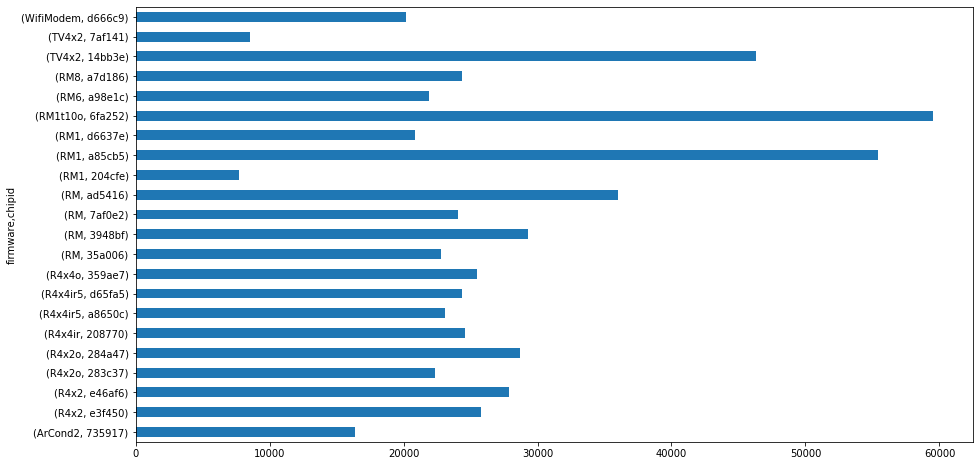

In [75]:
df2[['chipid','firmware','freeheap']].groupby(['firmware','chipid']).count().plot(kind='barh',legend=None)

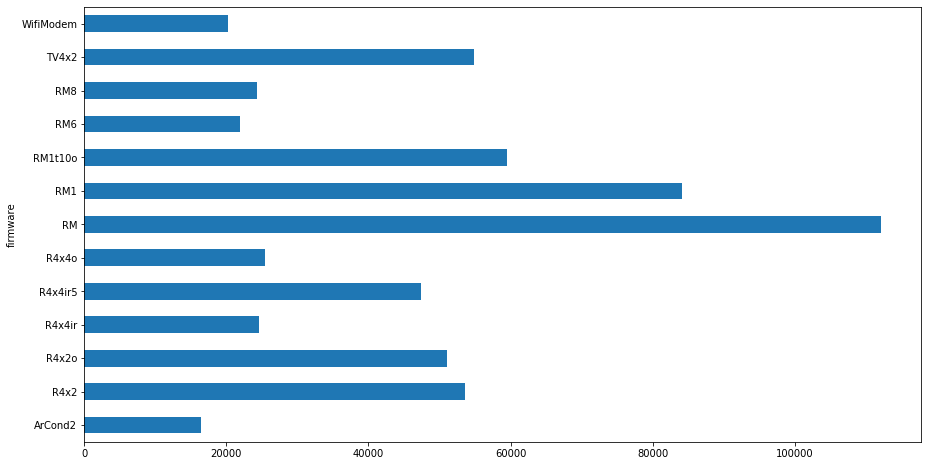

In [77]:
df2[['firmware','freeheap']].groupby('firmware').count().plot(kind='barh',legend=None)

In [54]:
cols = ['firmware','chipid','freeheap','wifi_level','fs_usedBytes','max_loop_wdt_cnt']

In [55]:
df2[cols].groupby(['firmware','chipid']).agg(['min', 'mean', 'max']).round(2)

freeheap                      wifi_level               \
                       min       mean       max        min   mean   max   
firmware  chipid                                                          
ArCond2   735917   28776.0   34415.54   35520.0      -73.0 -56.79 -42.0   
R4x2      e3f450   35016.0   40109.91   41248.0      -72.0 -54.83 -44.0   
          e46af6   35624.0   40080.76   41280.0      -91.0 -75.67 -63.0   
R4x2o     283c37   31032.0   36661.61   37840.0      -77.0 -58.75 -39.0   
          284a47   33360.0   36670.82   37776.0      -73.0 -51.92 -39.0   
R4x4ir    208770   32296.0   36260.03   37424.0      -62.0 -44.48 -33.0   
R4x4ir5   a8650c   33480.0   36234.43   37376.0      -88.0 -69.96 -58.0   
          d65fa5   32768.0   36183.65   37400.0      -82.0 -60.48 -52.0   
R4x4o     359ae7   32800.0   36516.33   37712.0      -88.0 -65.52 -44.0   
RM        35a006   33952.0   39085.76   40104.0      -92.0 -70.05 -51.0   
          3948bf   34960.0   39015.54   40104.0      -88.0 -69.87 -50.0   
          7af0e2   35008.0   39089.61   40184.0      -73.0 -53.94 -42.0   
          ad5416   35488.0   39045.06   40144.0      -76.0 -54.01 -44.0   
RM1       204cfe   32624.0   36881.13   37912.0      -74.0 -53.44 -45.0   
          a85cb5   31384.0   38921.13   40136.0      -93.0 -74.17 -49.0   
          d6637e   36136.0   40213.58   41120.0      -76.0 -59.58 -51.0   
RM1t10o   6fa252   32912.0   37197.38   38320.0      -50.0 -26.38 -15.0   
RM6       a98e1c  231840.0  245326.05  252528.0      -74.0 -45.96 -35.0   
RM8       a7d186   29904.0   35421.03   36632.0      -95.0 -77.16 -55.0   
TV4x2     14bb3e   33864.0   38657.05   39680.0      -60.0 -36.55 -24.0   
          7af141   31832.0   38487.13   39640.0      -63.0 -42.90 -32.0   
WifiModem d666c9   33656.0   37099.65   38224.0      -45.0 -21.41 -12.0   

                 fs_usedBytes                      max_loop_wdt_cnt           \
                          min       mean       max              min     mean   
firmware  chipid                                                               
ArCond2   735917     569519.0  587896.25  601145.0            165.0   342.03   
R4x2      e3f450      39490.0  408119.66  422935.0            160.0   317.29   
          e46af6      39487.0  394846.92  404110.0            102.0   430.30   
R4x2o     283c37      32589.0  355186.13  363197.0            101.0   324.91   
          284a47      84054.0  322075.46  331320.0            161.0   299.29   
R4x4ir    208770      44540.0  372348.39  382022.0            163.0   395.58   
R4x4ir5   a8650c     325798.0  347799.68  360185.0            162.0   424.43   
          d65fa5      55108.0  311714.75  321782.0            163.0   533.11   
R4x4o     359ae7     316762.0  332819.70  345125.0            163.0   419.61   
RM        35a006     286642.0  307832.22  332073.0              7.0   601.28   
          3948bf     290658.0  305935.89  332826.0             73.0   372.56   
          7af0e2     296180.0  306477.41  319021.0             62.0   391.25   
          ad5416     269072.0  277522.84  285638.0             60.0   355.58   
RM1       204cfe     326551.0  342966.63  354663.0             64.0   606.59   
          a85cb5     306973.0  332933.44  360687.0             61.0   573.41   
          d6637e     237195.0  249055.06  260036.0             62.0   418.55   
RM1t10o   6fa252     218872.0  241530.35  251251.0             62.0   360.46   
RM6       a98e1c     384532.0  399235.16  418166.0           1288.0  1288.00   
RM8       a7d186     484430.0  511579.59  546176.0            112.0   486.17   
TV4x2     14bb3e     421429.0  430775.82  440254.0            115.0   324.84   
          7af141     372735.0  383126.72  393317.0            165.0   237.17   
WifiModem d666c9     257275.0  271018.29  279614.0             62.0   302.23   

                          
                     max  
firmware  chipid          
ArCond2   735917   619.0  
R4x2      e3f450   498.0  
      

In [57]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,5)

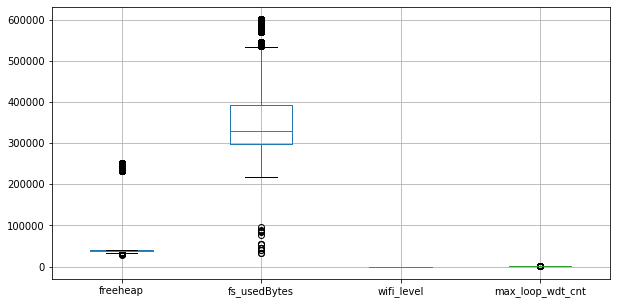

In [61]:
df2[['firmware','chipid','freeheap','fs_usedBytes','wifi_level','max_loop_wdt_cnt']].boxplot()

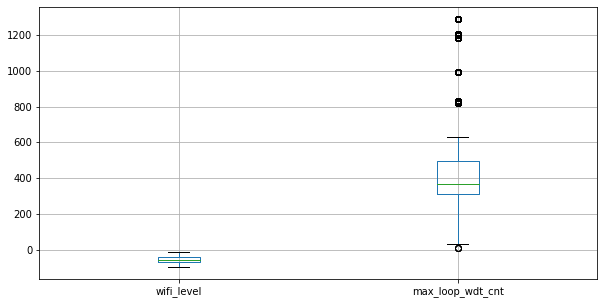

In [62]:
df2[['firmware','chipid','wifi_level','max_loop_wdt_cnt']].boxplot()

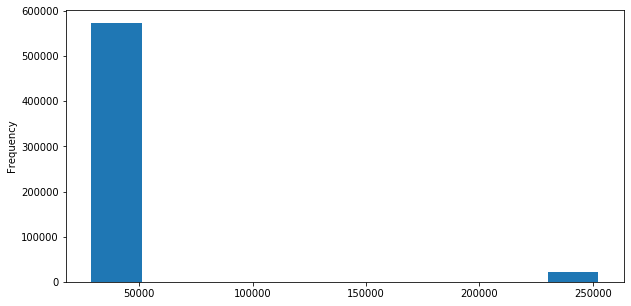

In [63]:
df2["freeheap"].plot(kind="hist")

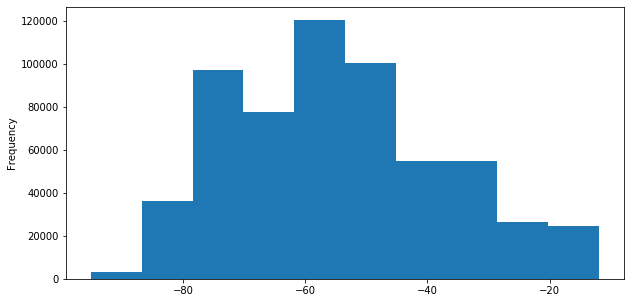

In [64]:
df2["wifi_level"].plot(kind="hist")

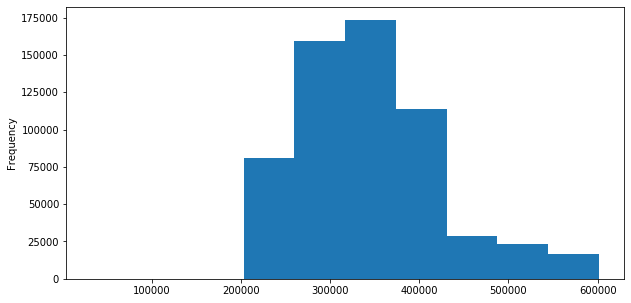

In [65]:
df2["fs_usedBytes"].plot(kind="hist")

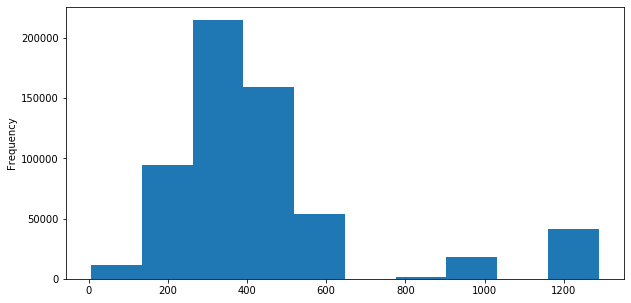

In [66]:
df2["max_loop_wdt_cnt"].plot(kind="hist")

In [68]:
df3 = df2[['freeheap','fs_usedBytes','wifi_level','max_loop_wdt_cnt']]

df3.corr()

,freeheap,fs_usedBytes,wifi_level,max_loop_wdt_cnt
freeheap,1.000000,0.126240,0.095649,0.603745
fs_usedBytes,0.126240,1.000000,-0.265052,0.089127
wifi_level,0.095649,-0.265052,1.000000,-0.123079
max_loop_wdt_cnt,0.603745,0.089127,-0.123079,1.000000


In [86]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,10)

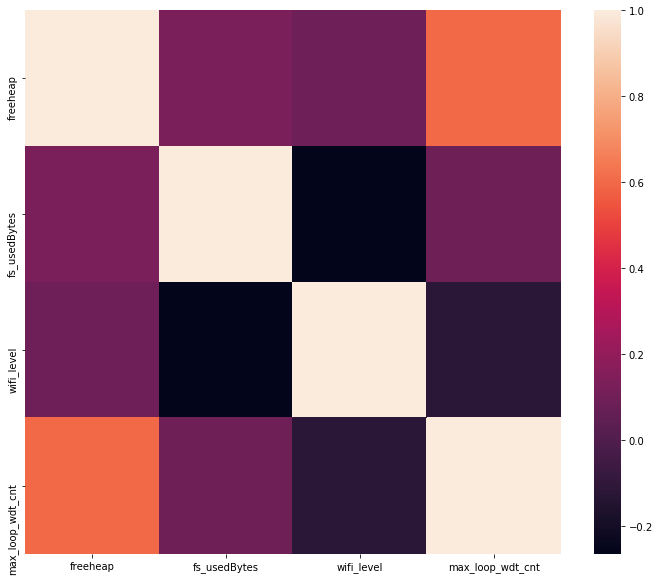

In [87]:
import seaborn as sns

corr = df3.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)